In [53]:
# Import the necessary features for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress
from sklearn import linear_model
import statsmodels.formula.api as smf
import pickle

# Improve the aesthetics
sns.set_style("white")


df_ny = pd.read_pickle('C:\\Users\\maken\\2.4.4_Challenge_Prepared_Data.pkl')

# Read the csv file. 'thousands' is used to format out the ',' when it appears in the numbers, skiprows will get rid of the first four rows (could also use skipheader), 
# skipfooter will remove the bottom three rows where the footnotes are located.
df_ms = pd.read_csv('C:\\Users\\maken\\table_8_offenses_known_to_law_enforcement_mississippi_by_city_2013.csv', thousands = ',', skiprows = 4, skipfooter = 2, na_values = 'scalar')


ny_model = pickle.load(open('C:\\Users\\maken\\NY_Property_Crimes_Regression_Model', 'rb'))

C:\Users\maken\lib\site-packages\ipykernel\__main__.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [19]:
df_ms.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Unnamed: 13
0,Aberdeen,5473,9,0,NaN,1.0,4,4,172,40,127,5,0,NaN
1,Amory,7167,5,0,NaN,1.0,2,2,265,81,181,3,2,NaN
2,Batesville,7417,18,2,NaN,1.0,5,10,447,72,360,15,1,NaN
3,Biloxi,44744,213,3,36.0,NaN,90,84,2316,703,1482,131,6,NaN
4,Byhalia,1270,10,0,NaN,0.0,0,10,71,19,51,1,0,NaN


In [54]:
df_ms = df_ms.iloc[:, [0, 1, 3, 6, 8]].dropna()
df_ms.columns = ['City', 'Population', 'Murder', 'Robbery', 'Property\ncrime']

#df_ms = df_ms.loc[:, ['City', 'Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]

# Time to make some features. Let's make these x/person.
df_ms['Robbery_per_thousand'] = df_ms['Robbery']/(df_ms['Population']/1000)
df_ms['Murder_per_thousand'] = df_ms['Murder']/(df_ms['Population']/1000)

df_ms['Robbery_0'] = np.where(df_ms['Robbery'] == 0, 0, 1)
df_ms['Murder_0'] = np.where(df_ms['Murder'] == 0, 0, 1)

df_ms['Population2'] = df_ms['Population'] * df_ms['Population']

In [55]:
df_ms.head()

,City,Population,Murder,Robbery,Property crime,Robbery_per_thousand,Murder_per_thousand,Robbery_0,Murder_0,Population2
0,Aberdeen,5473,0,4,172,0.730861,0.000000,1,0,29953729
1,Amory,7167,0,2,265,0.279057,0.000000,1,0,51365889
2,Batesville,7417,2,5,447,0.674127,0.269651,1,1,55011889
3,Biloxi,44744,3,90,2316,2.011443,0.067048,1,1,2002025536
4,Byhalia,1270,0,0,71,0.000000,0.000000,0,0,1612900


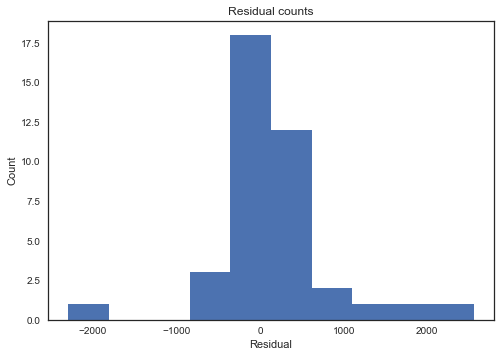

In [61]:
model_pred_ms = ny_model.predict(df_ms[['Population', 'Population2', 'Murder_0', 'Robbery_0', 'Murder_per_thousand', 'Robbery_per_thousand']]).ravel()

actual = df_ms['Property\ncrime']

# Calculate the error, also called the residual.
residual = actual - model_pred_ms


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [62]:
# Use scipy.stats.normaltest to test whether a sample differs from a normal distribution.
stats.normaltest(residual)

NormaltestResult(statistic=12.538115238013848, pvalue=0.0018940126239523232)

The low pvalue shows that the distrubtion has a 99% chance of being normal, or that there is a .189% chance that the results occurred by chance alone.